Apporoach

1. Import libraries
2. Load and Audit the data
3. Data preparation and Data transformation
      - Missing values: Impute all missing values using mean,mode,median.
      - Inconsistant values: Replace all inconsistances with consistent values
      - Outliers: Transform or let the algorithm deal
4. Data visualization
5. Data analysis
      - Uni-Variate Analysis(Mean,Mode,Median,Skewness)
      - Bi-Variate Analysis(Corelation,covariance,Chi-Sqare test)
      - Multi-Variate
                1.Regression:Not a regression
                1.Classification
       

#Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy import stats

##Load and Audit the data

In [ ]:
!unzip '/content/archive (9).zip'

Archive:  /content/archive (9).zip
  inflating: IRIS.csv                


In [ ]:
df =pd.read_csv('/content/IRIS.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To check for missisng values

In [ ]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

To check for outliers

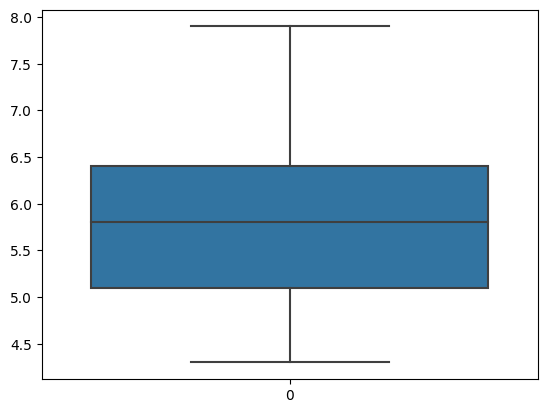

In [ ]:
sns.boxplot(df['sepal_length'])
plt.show()

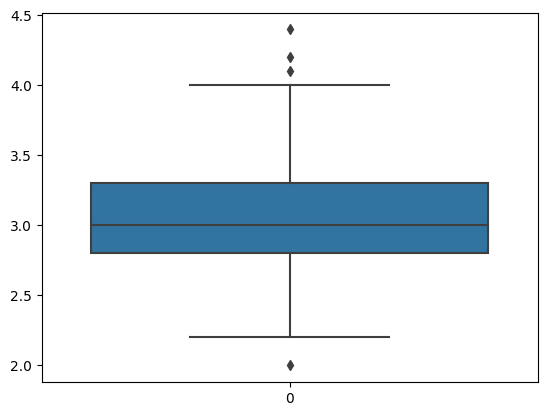

In [ ]:
sns.boxplot(df['sepal_width'])
plt.show()

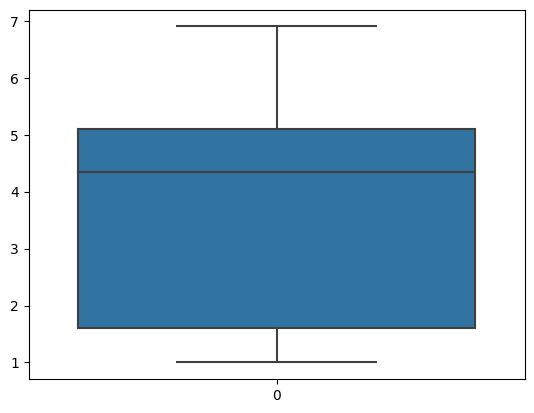

In [ ]:
sns.boxplot(df['petal_length'])
plt.show()

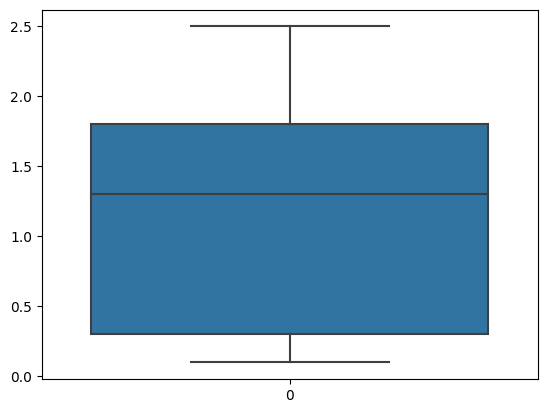

In [ ]:
sns.boxplot(df['petal_width'])
plt.show()

In [ ]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1


lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR


df1= df[(df[columns] >= lower_threshold) & (df[columns] <= upper_threshold)]


In [ ]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<Axes: >

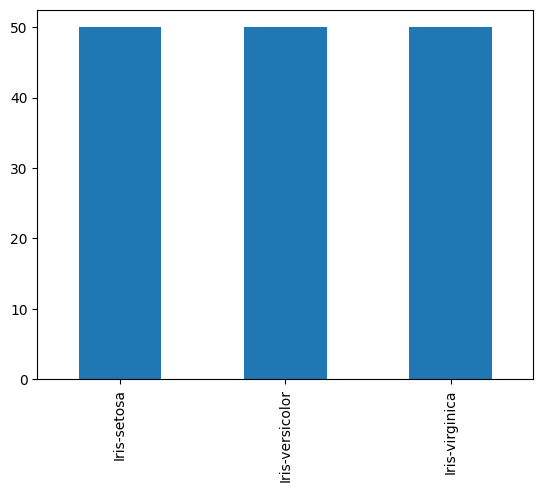

In [ ]:
df['species'].value_counts().plot(kind='bar')

In [ ]:
x=df.drop(['species'],axis=1)
y=df['species']

In [ ]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(120, 4)
(30, 4)
(30,)
(120,)


LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
pred_ytrain_lr = lr.predict(x_train)
pred_ytest_lr = lr.predict(x_test)

In [ ]:
def acc_report(actual,predicted):
  acc_score = accuracy_score(actual,predicted)
  cm_matrix = confusion_matrix(actual,predicted)
  class_rep = classification_report(actual,predicted)
  print("The accuracy is ", round(acc_score,2))
  print(cm_matrix)
  print(class_rep)

In [ ]:
acc_report(y_train,pred_ytrain_lr)

The accuracy is  0.98
[[40  0  0]
 [ 0 40  2]
 [ 0  1 37]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.98      0.95      0.96        42
 Iris-virginica       0.95      0.97      0.96        38

       accuracy                           0.97       120
      macro avg       0.97      0.98      0.97       120
   weighted avg       0.98      0.97      0.98       120



In [ ]:
acc_report(y_test,pred_ytest_lr)

The accuracy is  1.0
[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



DecisionTree

In [ ]:
  dtree = DecisionTreeClassifier(max_depth = 3,min_samples_split = 4)
  dtree.fit(x_train,y_train)
  preds_dtree_train = dtree.predict(x_train)
  preds_dtree_test = dtree.predict(x_test)


In [ ]:
acc_report(y_train,preds_dtree_train)

The accuracy is  0.97
[[40  0  0]
 [ 0 39  3]
 [ 0  1 37]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.97      0.93      0.95        42
 Iris-virginica       0.93      0.97      0.95        38

       accuracy                           0.97       120
      macro avg       0.97      0.97      0.97       120
   weighted avg       0.97      0.97      0.97       120



In [ ]:
acc_report(y_test,preds_dtree_test)

The accuracy is  1.0
[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators = 20,max_depth=3, verbose = 1)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, verbose=1)

In [ ]:
preds_rf_train = rf.predict(x_train)
preds_rf_test = rf.predict(x_test)

In [ ]:
acc_report(y_train,preds_rf_train)

The accuracy is  0.96
[[40  0  0]
 [ 0 39  3]
 [ 0  2 36]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.95      0.93      0.94        42
 Iris-virginica       0.92      0.95      0.94        38

       accuracy                           0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



In [ ]:
acc_report(y_test,preds_rf_test)

The accuracy is  1.0
[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

